In [1]:
import pandas as pd
import os
from scipy.stats import kstest,ttest_ind

# libraries related to plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
combo2_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british_male/data/additive/combo2.csv"
combo3_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/white_british_male/data/additive/combo3.csv"
df2 = pd.read_csv(combo2_file, usecols=["Expected_value", "Observed_value"])
df3 = pd.read_csv(combo3_file, usecols=["Expected_value", "Observed_value"])

df = pd.concat((df2, df3))

plot_df = df.melt(value_vars=["Observed_value", "Expected_value"])

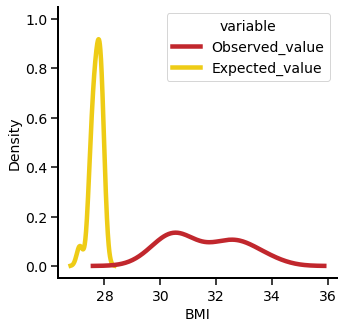

In [3]:
fig = plt.figure(figsize=(5,5))
g = sns.kdeplot(
    data=plot_df, x='value', hue='variable', 
    hue_order=["Observed_value", "Expected_value"], 
    palette=["#c1272d", "#eecc16"], 
    fill=False, linewidth=4.5,)
ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(2))
g.set_xlabel("BMI")
# g.set_title('Expected vs Observed for Obesity Risk Combinations');
g.set_ylim(-0.05, 1.05)
ax.spines[['right', 'top']].set_visible(False)
# pdf = PdfPages('figures/obs_exp.pdf')
# pdf.savefig(fig, bbox_inches='tight')
# pdf.close()

In [4]:
ttest_ind(plot_df.loc[plot_df.variable=="Expected_value", "value"], plot_df.loc[plot_df.variable=="Observed_value", "value"], alternative="less"), kstest(plot_df.loc[plot_df.variable=="Expected_value", "value"], plot_df.loc[plot_df.variable=="Observed_value", "value"])

(Ttest_indResult(statistic=-14.230368682204812, pvalue=2.255474216513858e-18),
 KstestResult(statistic=1.0, pvalue=2.429121062858555e-13))